In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\sarah jr\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
#import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and basic data cleaning

In [4]:
exoplanet = pd.read_csv('Resources/exoplanet_data.csv')
# Drop the null columns where all values are null
exoplanet = exoplanet.dropna(axis='columns', how='all')
# Drop the null rows
exoplanet = exoplanet.dropna()
exoplanet

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Select X and y Values

In [5]:
#assign all columns except koi_disposition to X, koi_disposition to y
X = exoplanet.drop(columns = 'koi_disposition')
y = exoplanet['koi_disposition']

print(X.shape, y.shape)

(6991, 40) (6991,)


# Train Test Split

In [6]:
#train, test, split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

In [7]:
#fit scaled data with MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)


#tranform scaled data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
#Encode Labels 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

encoded_y_train = label_encoder.transform(y_train)

encoded_y_test = label_encoder.transform(y_test)

In [9]:
#One-hot encoding
from keras.utils import to_categorical

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
y_train_categorical

Using TensorFlow backend.


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

# Fit the model

In [10]:
## Create a LogisticRegression model and fit it to the scaled training data

from sklearn.ensemble import RandomForestClassifier

In [12]:
# Loop through different n-estimators to see which has the highest accuracy
train_scores = []
test_scores = []
for n in range (25, 275, 25):
    random_forests = RandomForestClassifier(n_estimators=n)
    random_forests.fit(X_train_scaled, y_train_categorical)
    train_score = random_forests.score(X_train_scaled, y_train_categorical)
    test_score = random_forests.score(X_test_scaled, y_test_categorical)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {n}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 25, Train/Test Score: 0.998/0.866
k: 50, Train/Test Score: 1.000/0.868
k: 75, Train/Test Score: 1.000/0.876
k: 100, Train/Test Score: 1.000/0.871
k: 125, Train/Test Score: 1.000/0.879
k: 150, Train/Test Score: 1.000/0.880
k: 175, Train/Test Score: 1.000/0.879
k: 200, Train/Test Score: 1.000/0.874
k: 225, Train/Test Score: 1.000/0.881
k: 250, Train/Test Score: 1.000/0.879


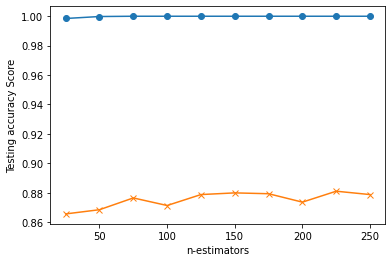

In [14]:
#plot RF train and test data
plt.plot(range(25, 275, 25), train_scores, marker='o')
plt.plot(range(25, 275, 25), test_scores, marker="x")
plt.xlabel("n-estimators")
plt.ylabel("Testing accuracy Score")
plt.show()

In [18]:
#fit train data with n_estimators=225
random_forests = RandomForestClassifier(n_estimators=225)
random_forests.fit(X_train_scaled, y_train_categorical)

#print train and test scores
print('n_estimator=225 Train Acc: %.3f' % random_forests.score(X_train_scaled, y_train_categorical))
print('n_estimator=225 Test Acc: %.3f' % random_forests.score(X_test_scaled, y_test_categorical))

n_estimator=225 Train Acc: 1.000
n_estimator=225 Test Acc: 0.881


# Hyperparameter Tuning

In [19]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200, 225, 250],
              'class_weight': ['balanced', 'balanced_subsample'],
              'max_features': ['auto', 'sqrt', 'log2']}


grid = GridSearchCV(random_forests, param_grid, verbose=3)
grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__bootstrap', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__max_samples', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__oob_score', 'estimator__random_state', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [20]:
# Fit the model using the grid search
grid.fit(X_train_scaled, y_train_categorical)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] class_weight=balanced, max_features=auto, n_estimators=25 .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=balanced, max_features=auto, n_estimators=25, score=0.875, total=   0.7s
[CV] class_weight=balanced, max_features=auto, n_estimators=25 .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  class_weight=balanced, max_features=auto, n_estimators=25, score=0.873, total=   0.6s
[CV] class_weight=balanced, max_features=auto, n_estimators=25 .......


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  class_weight=balanced, max_features=auto, n_estimators=25, score=0.866, total=   0.5s
[CV] class_weight=balanced, max_features=auto, n_estimators=25 .......
[CV]  class_weight=balanced, max_features=auto, n_estimators=25, score=0.850, total=   0.5s
[CV] class_weight=balanced, max_features=auto, n_estimators=25 .......
[CV]  class_weight=balanced, max_features=auto, n_estimators=25, score=0.868, total=   0.5s
[CV] class_weight=balanced, max_features=auto, n_estimators=50 .......
[CV]  class_weight=balanced, max_features=auto, n_estimators=50, score=0.878, total=   1.1s
[CV] class_weight=balanced, max_features=auto, n_estimators=50 .......
[CV]  class_weight=balanced, max_features=auto, n_estimators=50, score=0.875, total=   1.1s
[CV] class_weight=balanced, max_features=auto, n_estimators=50 .......
[CV]  class_weight=balanced, max_features=auto, n_estimators=50, score=0.867, total=   0.9s
[CV] class_weight=balanced, max_features=auto, n_estimators=50 .......
[CV]  class_weight=bal

[CV]  class_weight=balanced, max_features=sqrt, n_estimators=25, score=0.855, total=   0.6s
[CV] class_weight=balanced, max_features=sqrt, n_estimators=25 .......
[CV]  class_weight=balanced, max_features=sqrt, n_estimators=25, score=0.861, total=   0.6s
[CV] class_weight=balanced, max_features=sqrt, n_estimators=50 .......
[CV]  class_weight=balanced, max_features=sqrt, n_estimators=50, score=0.885, total=   1.1s
[CV] class_weight=balanced, max_features=sqrt, n_estimators=50 .......
[CV]  class_weight=balanced, max_features=sqrt, n_estimators=50, score=0.870, total=   1.0s
[CV] class_weight=balanced, max_features=sqrt, n_estimators=50 .......
[CV]  class_weight=balanced, max_features=sqrt, n_estimators=50, score=0.859, total=   1.0s
[CV] class_weight=balanced, max_features=sqrt, n_estimators=50 .......
[CV]  class_weight=balanced, max_features=sqrt, n_estimators=50, score=0.847, total=   1.0s
[CV] class_weight=balanced, max_features=sqrt, n_estimators=50 .......
[CV]  class_weight=bal

[CV]  class_weight=balanced, max_features=log2, n_estimators=25, score=0.850, total=   0.4s
[CV] class_weight=balanced, max_features=log2, n_estimators=50 .......
[CV]  class_weight=balanced, max_features=log2, n_estimators=50, score=0.865, total=   0.9s
[CV] class_weight=balanced, max_features=log2, n_estimators=50 .......
[CV]  class_weight=balanced, max_features=log2, n_estimators=50, score=0.868, total=   1.0s
[CV] class_weight=balanced, max_features=log2, n_estimators=50 .......
[CV]  class_weight=balanced, max_features=log2, n_estimators=50, score=0.856, total=   0.9s
[CV] class_weight=balanced, max_features=log2, n_estimators=50 .......
[CV]  class_weight=balanced, max_features=log2, n_estimators=50, score=0.845, total=   0.8s
[CV] class_weight=balanced, max_features=log2, n_estimators=50 .......
[CV]  class_weight=balanced, max_features=log2, n_estimators=50, score=0.854, total=   0.9s
[CV] class_weight=balanced, max_features=log2, n_estimators=75 .......
[CV]  class_weight=bal

[CV]  class_weight=balanced_subsample, max_features=auto, n_estimators=25, score=0.866, total=   0.6s
[CV] class_weight=balanced_subsample, max_features=auto, n_estimators=50 
[CV]  class_weight=balanced_subsample, max_features=auto, n_estimators=50, score=0.872, total=   1.2s
[CV] class_weight=balanced_subsample, max_features=auto, n_estimators=50 
[CV]  class_weight=balanced_subsample, max_features=auto, n_estimators=50, score=0.864, total=   1.4s
[CV] class_weight=balanced_subsample, max_features=auto, n_estimators=50 
[CV]  class_weight=balanced_subsample, max_features=auto, n_estimators=50, score=0.866, total=   1.2s
[CV] class_weight=balanced_subsample, max_features=auto, n_estimators=50 
[CV]  class_weight=balanced_subsample, max_features=auto, n_estimators=50, score=0.859, total=   1.2s
[CV] class_weight=balanced_subsample, max_features=auto, n_estimators=50 
[CV]  class_weight=balanced_subsample, max_features=auto, n_estimators=50, score=0.859, total=   1.2s
[CV] class_weight=

[CV]  class_weight=balanced_subsample, max_features=sqrt, n_estimators=25, score=0.877, total=   0.6s
[CV] class_weight=balanced_subsample, max_features=sqrt, n_estimators=25 
[CV]  class_weight=balanced_subsample, max_features=sqrt, n_estimators=25, score=0.868, total=   0.6s
[CV] class_weight=balanced_subsample, max_features=sqrt, n_estimators=25 
[CV]  class_weight=balanced_subsample, max_features=sqrt, n_estimators=25, score=0.855, total=   0.7s
[CV] class_weight=balanced_subsample, max_features=sqrt, n_estimators=25 
[CV]  class_weight=balanced_subsample, max_features=sqrt, n_estimators=25, score=0.861, total=   0.6s
[CV] class_weight=balanced_subsample, max_features=sqrt, n_estimators=50 
[CV]  class_weight=balanced_subsample, max_features=sqrt, n_estimators=50, score=0.871, total=   1.2s
[CV] class_weight=balanced_subsample, max_features=sqrt, n_estimators=50 
[CV]  class_weight=balanced_subsample, max_features=sqrt, n_estimators=50, score=0.869, total=   1.2s
[CV] class_weight=

[CV]  class_weight=balanced_subsample, max_features=sqrt, n_estimators=250, score=0.856, total=   9.2s
[CV] class_weight=balanced_subsample, max_features=sqrt, n_estimators=250 
[CV]  class_weight=balanced_subsample, max_features=sqrt, n_estimators=250, score=0.870, total=   9.1s
[CV] class_weight=balanced_subsample, max_features=log2, n_estimators=25 
[CV]  class_weight=balanced_subsample, max_features=log2, n_estimators=25, score=0.875, total=   1.0s
[CV] class_weight=balanced_subsample, max_features=log2, n_estimators=25 
[CV]  class_weight=balanced_subsample, max_features=log2, n_estimators=25, score=0.857, total=   0.8s
[CV] class_weight=balanced_subsample, max_features=log2, n_estimators=25 
[CV]  class_weight=balanced_subsample, max_features=log2, n_estimators=25, score=0.865, total=   0.9s
[CV] class_weight=balanced_subsample, max_features=log2, n_estimators=25 
[CV]  class_weight=balanced_subsample, max_features=log2, n_estimators=25, score=0.854, total=   0.8s
[CV] class_weig

[CV]  class_weight=balanced_subsample, max_features=log2, n_estimators=250, score=0.875, total=   6.1s
[CV] class_weight=balanced_subsample, max_features=log2, n_estimators=250 
[CV]  class_weight=balanced_subsample, max_features=log2, n_estimators=250, score=0.876, total=   5.7s
[CV] class_weight=balanced_subsample, max_features=log2, n_estimators=250 
[CV]  class_weight=balanced_subsample, max_features=log2, n_estimators=250, score=0.867, total=   5.7s
[CV] class_weight=balanced_subsample, max_features=log2, n_estimators=250 
[CV]  class_weight=balanced_subsample, max_features=log2, n_estimators=250, score=0.850, total=   5.8s
[CV] class_weight=balanced_subsample, max_features=log2, n_estimators=250 
[CV]  class_weight=balanced_subsample, max_features=log2, n_estimators=250, score=0.853, total=   5.7s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 16.8min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=225),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200,
                                          225, 250]},
             verbose=3)

In [21]:
# List the best parameters for this dataset
print(grid.best_params_)
print(grid.best_score_)

{'class_weight': 'balanced', 'max_features': 'auto', 'n_estimators': 125}
0.872779419148735


In [22]:
import joblib
filename = 's_heavner_rf.sav'
joblib.dump(random_forests, filename)

['s_heavner_rf.sav']